In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
nikhil = pd.read_excel("E:/Python Programs/Weekly milk Route_test.xlsx", header=1)
nikhil.drop(labels=["Unnamed: 0"],axis=1, inplace=True)
nikhil.shape
nikhil

,Customer Code,Customer Name,Category Description,Day Id,Week Day Full,Product Code,Product Description,Quantity,Qty (GAU)
0,0050D,BREDA RYAN,DOORSTEP,2024-03-29,Friday,121,LOW FAT 1LTR CTN,2,2.0
1,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,101,MILK 1LTR CTN,9,9.0
2,NaN,NaN,NaN,2024-03-29,Friday,103,MILK 2LTR BTL,12,24.0
3,NaN,NaN,NaN,2024-03-29,Friday,104,LOW FAT 2LTR BTL,1,2.0
4,NaN,NaN,NaN,2024-03-29,Friday,110,MILK 500ML BTL,2,1.0
...,...,...,...,...,...,...,...,...,...
468,NaN,NaN,NaN,2024-04-04,Thursday,121,LOW FAT 1LTR CTN,0,0.0
469,NaN,NaN,NaN,2024-04-04,Thursday,202,CREAM 250ML CUP THURLES,4,1.0
470,4104D,DUNNES STORES,MULTIPLE,2024-04-04,Thursday,103,MILK 2LTR BTL,30,60.0
471,NaN,NaN,NaN,2024-04-04,Thursday,104,LOW FAT 2LTR BTL,3,6.0


In [3]:
nikhil.fillna(method="ffill", inplace=True)

C:\Users\skong\AppData\Local\Temp\ipykernel_5124\2500852901.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nikhil.fillna(method="ffill", inplace=True)


In [4]:
nikhil.rename(mapper={"Customer Code":"cust_code","Customer Name":"cust_name","Category Description":"cat_desc","Day Id":"date", 
                     "Week Day Full":"day","Product Code":"prod_code","Product Description":"prod_desc","Quantity":"quantity",
                     "Qty (GAU)":"GAU"},axis=1,inplace=True)
nikhil

,cust_code,cust_name,cat_desc,date,day,prod_code,prod_desc,quantity,GAU
0,0050D,BREDA RYAN,DOORSTEP,2024-03-29,Friday,121,LOW FAT 1LTR CTN,2,2.0
1,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,101,MILK 1LTR CTN,9,9.0
2,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,103,MILK 2LTR BTL,12,24.0
3,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,104,LOW FAT 2LTR BTL,1,2.0
4,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,110,MILK 500ML BTL,2,1.0
...,...,...,...,...,...,...,...,...,...
468,4008D,CAPPANILLY SERVICES LTD,SHOP,2024-04-04,Thursday,121,LOW FAT 1LTR CTN,0,0.0
469,4008D,CAPPANILLY SERVICES LTD,SHOP,2024-04-04,Thursday,202,CREAM 250ML CUP THURLES,4,1.0
470,4104D,DUNNES STORES,MULTIPLE,2024-04-04,Thursday,103,MILK 2LTR BTL,30,60.0
471,4104D,DUNNES STORES,MULTIPLE,2024-04-04,Thursday,104,LOW FAT 2LTR BTL,3,6.0


In [5]:
nikhil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   cust_code  473 non-null    object        
 1   cust_name  473 non-null    object        
 2   cat_desc   473 non-null    object        
 3   date       473 non-null    datetime64[ns]
 4   day        473 non-null    object        
 5   prod_code  473 non-null    int64         
 6   prod_desc  473 non-null    object        
 7   quantity   473 non-null    int64         
 8   GAU        473 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 33.4+ KB


In [6]:
nikhil[["cust_name","prod_desc","quantity"]].groupby(["cust_name","prod_desc"],sort=False).size()

cust_name               prod_desc        
BREDA RYAN              LOW FAT 1LTR CTN     3
PATRICK MEAGHER         MILK 1LTR CTN        3
                        MILK 2LTR BTL        2
                        LOW FAT 2LTR BTL     2
                        MILK 500ML BTL       2
                                            ..
TESCO STORE NO 6309     MILK 1LTR CTN        1
                        MILK 2LTR BTL        1
                        LOW FAT 2LTR BTL     1
FIACRI HSE. RESTAURANT  MILK 3LTR BTL        1
                        CREAM 3LTR BOTTLE    1
Length: 167, dtype: int64

In [7]:
nikhil[["cust_name","prod_desc","quantity"]].value_counts(sort=True,ascending=False)

cust_name                prod_desc                quantity
DUNNES CENTRA            MILK 500ML BTL            5          5
MARCELLA RYAN            MILK 2LTR BTL             18         5
TNMS LTD T/A EUROSPAR    MILK 500ML BTL            10         4
CAPPANILLY SERVICES LTD  MILK 500ML BTL            20         4
LUA & JOE FITZPATRICK    MILK 1LTR CTN             10         4
                                                             ..
GARDA RESTAURANT         SKIM MILK 500ML BTL       10         1
GARDA TRAINING COLLEGE   MEADOW 2LTR LOW FAT BTL  -6          1
                         MILK 500ML BTL           -20         1
HOGANS SHOP              CREAM 250ML CUP THURLES   2          1
TREVOR MOLONEY           SKIM MILK 500ML BTL       5          1
Name: count, Length: 328, dtype: int64

In [8]:
nikhil.quantity.describe()

count    473.000000
mean       8.403805
std       10.104525
min      -50.000000
25%        2.000000
50%        5.000000
75%       10.000000
max       80.000000
Name: quantity, dtype: float64

In [9]:
nikhil[['day','prod_desc']].value_counts()

day        prod_desc               
Friday     MILK 1LTR CTN               21
Monday     MILK 1LTR CTN               20
Friday     MILK 2LTR BTL               16
Monday     MILK 2LTR BTL               14
Wednesday  MILK 2LTR BTL               14
                                       ..
Thursday   SLIMMILK 1LTR BTL            1
           SKIM MILK 500ML BTL          1
Saturday   SLIMMILK 1LTR BTL            1
           TIPP BUTTER 1LB              1
Friday     BUTTER PORTIONS 600 PACK     1
Name: count, Length: 95, dtype: int64

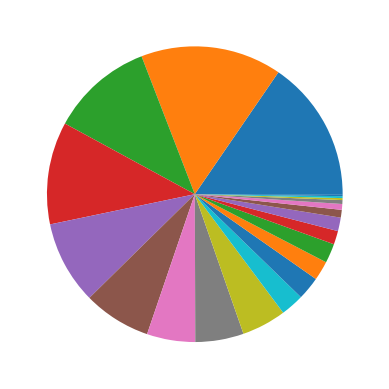

In [10]:
plt.pie(x=nikhil[['prod_desc']].value_counts())
plt.show()

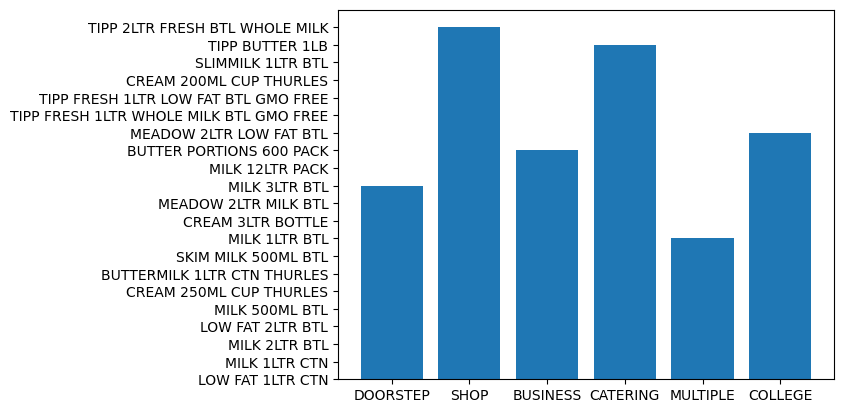

In [11]:
plt.bar(x="cat_desc",height="prod_desc",data=nikhil)
plt.show()

In [12]:
nikhil.day.unique()

array(['Friday', 'Saturday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday'],
      dtype=object)

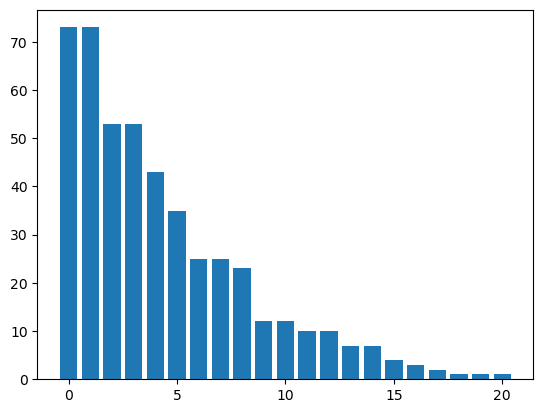

In [13]:
plt.bar(x=np.arange(0,21),height=nikhil.prod_desc.value_counts())
plt.show()

In [14]:
df=nikhil.prod_desc.value_counts()
df=df.to_frame()
df.rename(columns={"count":"Total"},inplace=True)
df.reset_index(inplace=True)
df

,prod_desc,Total
0,MILK 2LTR BTL,73
1,MILK 1LTR CTN,73
2,LOW FAT 1LTR CTN,53
3,LOW FAT 2LTR BTL,53
4,MILK 500ML BTL,43
5,MILK 3LTR BTL,35
6,MILK 1LTR BTL,25
7,CREAM 250ML CUP THURLES,25
8,MEADOW 2LTR MILK BTL,23
9,SKIM MILK 500ML BTL,12


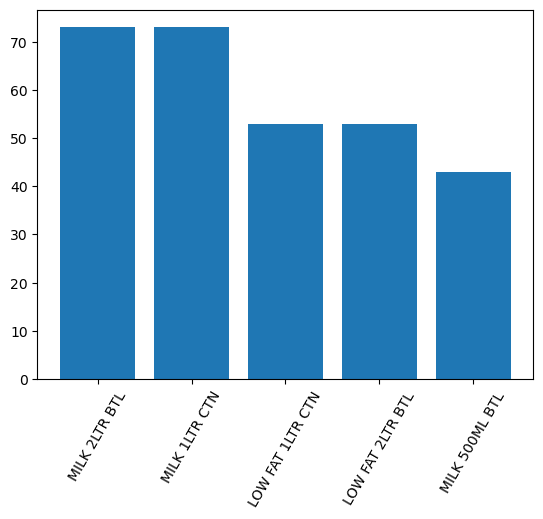

In [15]:
plt.bar(x=df.prod_desc.head(5),height=df["Total"].head(5), data=df)
plt.xticks(rotation=60)
plt.show()

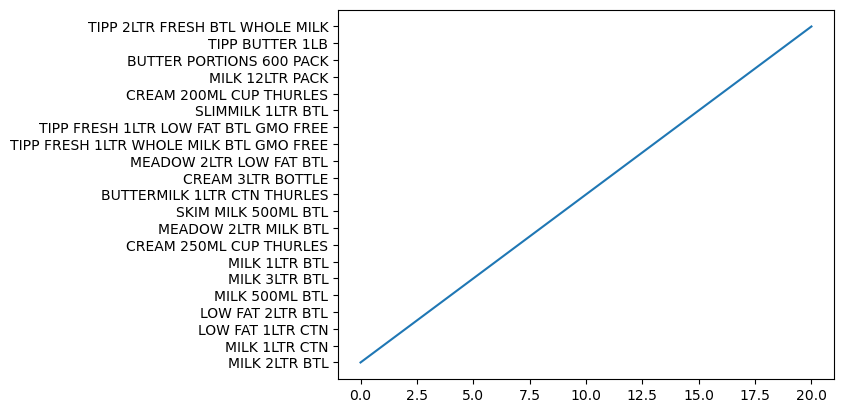

In [16]:
plt.plot("prod_desc", data=df)
plt.show()

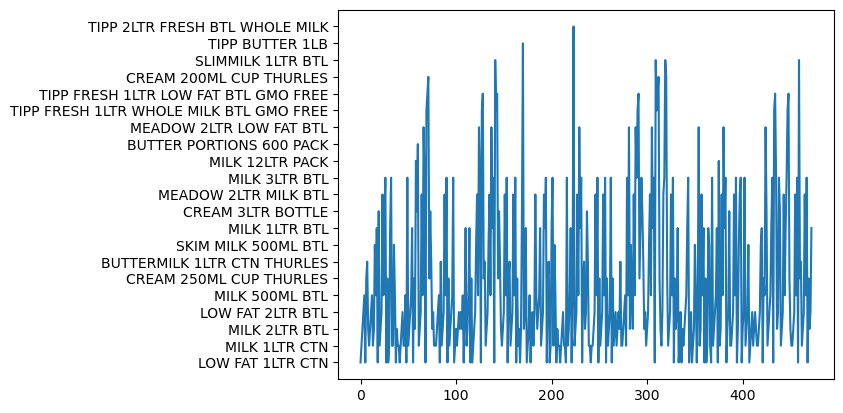

In [17]:
plt.plot("prod_desc", data=nikhil)
plt.show()

In [18]:
sf=pd.pivot_table(data=nikhil,values="quantity",columns=["day"],index="cust_name",aggfunc="count",fill_value=0,margins=True,margins_name="Total",sort=False)
sf.head()

day,Friday,Saturday,Monday,Tuesday,Wednesday,Thursday,Total
cust_name,,,,,,,
BREDA RYAN,1,0,1,0,1,0,3
PATRICK MEAGHER,7,0,4,0,3,0,14
ORMOND HEALTHCARE T/A PATTERSONS NURSING HOME,1,0,0,0,1,0,2
GALA EXPRESS CLOVER ROSS RETAIL,4,2,4,0,3,0,13
LUA & JOE FITZPATRICK,6,6,4,4,5,7,32


In [19]:
def yes_no(x):
    if x.Friday>0:
        x="yes"
    elif x.Saturday>0:
        x="yes"
    elif x.Monday>0:
        x="yes"
    elif x.Tuesday>0:
        x="yes"
    elif x.Wednesday>0:
        x="yes"
    elif x.Thursday>0:
        x="yes"
    else:
        x="no"

In [20]:
sf[["Friday"]][:1]

day,Friday
cust_name,
BREDA RYAN,1


In [21]:
def yes_n(df):
    my_df=pd.DataFrame(df)
    r=np.arange(0,54)
    i=0
    lis=list(my_df.columns)
    for x in lis:
        for y in my_df[x]:
            if my_df[x][r[i]:r[i+1]]>0:
                my_df[x][r[i]:r[i+1]]="yes"
            else:
                my_df[x][r[i]:r[i+1]]="no"
            i=i+1
        i=0

In [117]:
# sf["Friday"] = sf.Friday.apply(lambda x: "yes" if x>=1 else "no")
sf.head()

day,Friday,Saturday,Monday,Tuesday,Wednesday,Thursday,Total
cust_name,,,,,,,
BREDA RYAN,yes,0,1,0,1,0,3
PATRICK MEAGHER,yes,0,4,0,3,0,14
ORMOND HEALTHCARE T/A PATTERSONS NURSING HOME,yes,0,0,0,1,0,2
GALA EXPRESS CLOVER ROSS RETAIL,yes,2,4,0,3,0,13
LUA & JOE FITZPATRICK,yes,6,4,4,5,7,32


In [22]:
for x in list(sf["Friday"]):
    if x>0:
        print("Yes")
    else:
        print("no")

Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
Yes


In [23]:
# sf.apply(lambda x: "Yes" if (x.Friday>0 and x.Saturday>0 and x.Monday>0 and x.Tuesday>0 and x.Wednesday>0 and x.Thursday>0) else "No",axis=1)

sf["Saturday"].apply(lambda x:"Yes" if x>0 else "No")

cust_name
BREDA RYAN                                        No
PATRICK MEAGHER                                   No
ORMOND HEALTHCARE T/A PATTERSONS NURSING HOME     No
GALA EXPRESS CLOVER ROSS RETAIL                  Yes
LUA & JOE FITZPATRICK                            Yes
FALCOR INVESTMENT LT TA MURPHY PUB                No
DUNNES CENTRA                                    Yes
MGT. O' MEARA                                     No
MRS. STAPLETON                                    No
MRS. DALY                                         No
PATSY DORNEY                                      No
MRS BRIDGIT WORT                                  No
MRS. FLANAGAN                                     No
MRS. DELANEY                                      No
NANCY JORDAN                                      No
MRS. CORNALLY                                     No
THE TEA ROOMS                                     No
RYAN MARY                                         No
KERRIGAN TIM MRS                    

In [24]:
Milk_Total=[]
for x in nikhil.prod_desc.unique():
    if (x.find("MILK") ==0 and x.find("FAT")==0) or (x.find("BUTTERMILK")==-1 and x.find("CREAM")==-1 and x.find("BUTTER")==-1):
        Milk_Total.append(x)
Milk_Total

['LOW FAT 1LTR CTN',
 'MILK 1LTR CTN',
 'MILK 2LTR BTL',
 'LOW FAT 2LTR BTL',
 'MILK 500ML BTL',
 'SKIM MILK 500ML BTL',
 'MILK 1LTR BTL',
 'MEADOW 2LTR MILK BTL',
 'MILK 3LTR BTL',
 'MILK 12LTR PACK',
 'MEADOW 2LTR LOW FAT BTL',
 'TIPP FRESH 1LTR WHOLE MILK BTL GMO FREE',
 'TIPP FRESH 1LTR LOW FAT BTL GMO FREE',
 'SLIMMILK 1LTR BTL',
 'TIPP 2LTR FRESH BTL WHOLE MILK']

In [25]:
nikhil.prod_desc.unique()

array(['LOW FAT 1LTR CTN', 'MILK 1LTR CTN', 'MILK 2LTR BTL',
       'LOW FAT 2LTR BTL', 'MILK 500ML BTL', 'CREAM 250ML CUP THURLES',
       'BUTTERMILK 1LTR CTN THURLES', 'SKIM MILK 500ML BTL',
       'MILK 1LTR BTL', 'CREAM 3LTR BOTTLE', 'MEADOW 2LTR MILK BTL',
       'MILK 3LTR BTL', 'MILK 12LTR PACK', 'BUTTER PORTIONS 600 PACK',
       'MEADOW 2LTR LOW FAT BTL',
       'TIPP FRESH 1LTR WHOLE MILK BTL GMO FREE',
       'TIPP FRESH 1LTR LOW FAT BTL GMO FREE', 'CREAM 200ML CUP THURLES',
       'SLIMMILK 1LTR BTL', 'TIPP BUTTER 1LB',
       'TIPP 2LTR FRESH BTL WHOLE MILK'], dtype=object)

In [26]:
nikhil.cust_code.value_counts().size

54

In [27]:
nikhil.cust_name.value_counts().size

53

In [28]:
nikhil.cat_desc.value_counts().size

6

In [29]:
nikhil.prod_code.value_counts().size

21

In [30]:
nikhil.prod_desc.value_counts().size

21

In [31]:
nikhil.prod_desc.value_counts(normalize=True)

prod_desc
MILK 2LTR BTL                              0.154334
MILK 1LTR CTN                              0.154334
LOW FAT 1LTR CTN                           0.112051
LOW FAT 2LTR BTL                           0.112051
MILK 500ML BTL                             0.090909
MILK 3LTR BTL                              0.073996
MILK 1LTR BTL                              0.052854
CREAM 250ML CUP THURLES                    0.052854
MEADOW 2LTR MILK BTL                       0.048626
SKIM MILK 500ML BTL                        0.025370
BUTTERMILK 1LTR CTN THURLES                0.025370
CREAM 3LTR BOTTLE                          0.021142
MEADOW 2LTR LOW FAT BTL                    0.021142
TIPP FRESH 1LTR WHOLE MILK BTL GMO FREE    0.014799
TIPP FRESH 1LTR LOW FAT BTL GMO FREE       0.014799
SLIMMILK 1LTR BTL                          0.008457
CREAM 200ML CUP THURLES                    0.006342
MILK 12LTR PACK                            0.004228
BUTTER PORTIONS 600 PACK                   0.002114
TI

In [32]:
nikhil.head(5)

,cust_code,cust_name,cat_desc,date,day,prod_code,prod_desc,quantity,GAU
0,0050D,BREDA RYAN,DOORSTEP,2024-03-29,Friday,121,LOW FAT 1LTR CTN,2,2.0
1,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,101,MILK 1LTR CTN,9,9.0
2,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,103,MILK 2LTR BTL,12,24.0
3,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,104,LOW FAT 2LTR BTL,1,2.0
4,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,110,MILK 500ML BTL,2,1.0


In [33]:
nikhil.query("cat_desc in ('DOORSTEP','SHOP')").cat_desc.value_counts(normalize=True)

cat_desc
SHOP        0.861728
DOORSTEP    0.138272
Name: proportion, dtype: float64

In [34]:
np.unique(nikhil.prod_desc, return_counts=True)

(array(['BUTTER PORTIONS 600 PACK', 'BUTTERMILK 1LTR CTN THURLES',
        'CREAM 200ML CUP THURLES', 'CREAM 250ML CUP THURLES',
        'CREAM 3LTR BOTTLE', 'LOW FAT 1LTR CTN', 'LOW FAT 2LTR BTL',
        'MEADOW 2LTR LOW FAT BTL', 'MEADOW 2LTR MILK BTL',
        'MILK 12LTR PACK', 'MILK 1LTR BTL', 'MILK 1LTR CTN',
        'MILK 2LTR BTL', 'MILK 3LTR BTL', 'MILK 500ML BTL',
        'SKIM MILK 500ML BTL', 'SLIMMILK 1LTR BTL',
        'TIPP 2LTR FRESH BTL WHOLE MILK', 'TIPP BUTTER 1LB',
        'TIPP FRESH 1LTR LOW FAT BTL GMO FREE',
        'TIPP FRESH 1LTR WHOLE MILK BTL GMO FREE'], dtype=object),
 array([ 1, 12,  3, 25, 10, 53, 53, 10, 23,  2, 25, 73, 73, 35, 43, 12,  4,
         1,  1,  7,  7], dtype=int64))

In [35]:
nikhil[["prod_desc","cust_name"]].value_counts()

prod_desc                 cust_name                
MILK 2LTR BTL             DUNNES STORES                6
MILK 3LTR BTL             TNMS LTD T/A EUROSPAR        6
MEADOW 2LTR MILK BTL      CAPPANILLY SERVICES LTD      6
MILK 1LTR CTN             HURLEYS SHOP                 6
LOW FAT 2LTR BTL          HURLEYS SHOP                 6
                                                      ..
MILK 3LTR BTL             FIACRI HSE. RESTAURANT       1
CREAM 3LTR BOTTLE         DAYCARE CENTRE               1
MILK 3LTR BTL             MONTORE CREAMERY             1
CREAM 3LTR BOTTLE         CARROLL FOOD SERVICES LTD    1
BUTTER PORTIONS 600 PACK  CARROLL FOOD SERVICES LTD    1
Name: count, Length: 167, dtype: int64

In [36]:
nikhil.groupby(["prod_desc","cust_name"]).size()

prod_desc                                cust_name                
BUTTER PORTIONS 600 PACK                 CARROLL FOOD SERVICES LTD    1
BUTTERMILK 1LTR CTN THURLES              DAYCARE CENTRE               1
                                         DUNNES CENTRA                2
                                         HURLEYS SHOP                 3
                                         MARCELLA RYAN                1
                                                                     ..
TIPP BUTTER 1LB                          BEEKOFF INVESTMENTS          1
TIPP FRESH 1LTR LOW FAT BTL GMO FREE     DUNNES CENTRA                3
                                         TNMS LTD T/A EUROSPAR        4
TIPP FRESH 1LTR WHOLE MILK BTL GMO FREE  DUNNES CENTRA                3
                                         TNMS LTD T/A EUROSPAR        4
Length: 167, dtype: int64

In [37]:
nikhil[nikhil.cust_name=="BREDA RYAN"].day.value_counts()

day
Friday       1
Monday       1
Wednesday    1
Name: count, dtype: int64

In [38]:
nikhil[nikhil.cust_name=="BREDA RYAN"].prod_desc.value_counts()

prod_desc
LOW FAT 1LTR CTN    3
Name: count, dtype: int64

In [39]:
nikhil[nikhil.cust_name=="BREDA RYAN"].cat_desc.value_counts()

cat_desc
DOORSTEP    3
Name: count, dtype: int64

In [40]:
nikhil.quantity.describe()

count    473.000000
mean       8.403805
std       10.104525
min      -50.000000
25%        2.000000
50%        5.000000
75%       10.000000
max       80.000000
Name: quantity, dtype: float64

In [41]:
nikhil.quantity.sort_values()

462   -50
280   -20
452   -10
281    -6
458    -4
       ..
104    42
148    50
243    50
322    70
157    80
Name: quantity, Length: 473, dtype: int64

In [42]:
473/2

236.5

In [43]:
# calculating the "mean, median, min, max" values manually. "Note - Don't worry about the indexes because after sorting the values, indexes wil change"
# total 473 samples, therefore the "middle value or median value" should be between 236 and 237
# Mean value is nothing but wherever the major portion of the data points exists, in that region mean value will exist.
# Median value will tell you that 50% of the data points (i.e., 236 data points) are less than the median value which is 5
# and remaining 50% of the data points (i.e., 237 data points) are greater than the median value 5

nikhil.quantity.sum()/473, nikhil.quantity.sort_values()[236:238], (5+5)/2, nikhil.quantity.sort_values()[0:1], nikhil.quantity.sort_values()[472:]

(8.403805496828753,
 220    5
 123    5
 Name: quantity, dtype: int64,
 5.0,
 462   -50
 Name: quantity, dtype: int64,
 157    80
 Name: quantity, dtype: int64)

In [44]:
# Manually checking how many samples are less than the median value 5
# Note - Here median value 5 has occured 23 times

np.sum(nikhil.quantity<5)

218

In [45]:
# Manually checking how many samples are greater than the median value
# Note - Here median value 5 has occured 23 times

np.sum(nikhil.quantity>5)

232

In [46]:
218+232+23

473

In [47]:
# out of the total data points, 25% of the data points are less than or equal to the value 2.
# out of the total data points, 50% of the data points are less than or equal to the value 5.
# out of the total data points, 75% of the data points are less than or equal to the value 10.
# out of the total data points, 100% of the data points are less than or equal to the value 80.

nikhil.quantity.quantile(q=[0.25,0.50,0.75,1])

0.25     2.0
0.50     5.0
0.75    10.0
1.00    80.0
Name: quantity, dtype: float64

In [48]:
np.percentile(nikhil.quantity, q=[25,50,75,100])

array([ 2.,  5., 10., 80.])

In [49]:
# 128 data points are less than or equal to the value 2
# 241 data points are less than or equal to the value 5
# 357 data points are less than or equal to the value 10
# 473 data points are less than or equal to the value 80

np.sum(nikhil.quantity<=2), np.sum(nikhil.quantity<=5), np.sum(nikhil.quantity<=10), np.sum(nikhil.quantity<=80)

(128, 241, 357, 473)

In [50]:
# 414 data points are more than or equal to the value 2
# 255 data points are more than or equal to the value 5
# 158 data points are more than or equal to the value 10
# 1 data point is more than or equal to the value 80

np.sum(nikhil.quantity>=2), np.sum(nikhil.quantity>=5), np.sum(nikhil.quantity>=10), np.sum(nikhil.quantity>=80)

(414, 255, 158, 1)

In [51]:
# out of the total data points, 95% of the data points (i.e., 473 data points) are less than or equal to the value 30

nikhil.quantity.quantile(q=[0.95])

0.95    30.0
Name: quantity, dtype: float64

In [52]:
# out of the total data points, 10% of the data points (i.e., 47 data points) are less than or equal to the value 1

nikhil.quantity.quantile(q=[0.1])

0.1    1.0
Name: quantity, dtype: float64

In [53]:
# Right Skewed data because "mean>median" and the range on the right hand side/second half is more 
# i.e., 75 range on right hand side
# Similarly if "mean<median" the it will a left skewed data.
# Note:- Skew value should always be close to zero "0" in any data if you are trying to make that column normally distributed.

nikhil.quantity.min(),nikhil.quantity.max(),nikhil.quantity.mean(),nikhil.quantity.median(),nikhil.quantity.count()

(-50, 80, 8.403805496828753, 5.0, 473)

In [54]:
# 50% of the data points (i.e.,473//2=236 data points) are distributed from "-50 to 5" on left hand 
# side or in first half from the median 5.0
# i.e., 236 data points are scattered with a range of 55 on left hand side

first_half_range=np.abs(nikhil.quantity.min()-nikhil.quantity.median())
first_half_range

55.0

In [55]:
# remaining 50% of the data points (i.e.237 data points) are distributed from "5 to 80" on right hand 
# side or in second half from the median 5.0
# i.e., 237 data points are scattered with a range of 75 on Right hand side

second_half_range=np.abs(nikhil.quantity.median()-nikhil.quantity.max())
second_half_range

75.0

In [56]:
# if the skew value is positive then it's a right skewed data
# if the skew value is negative then it's a left skewed data
# if the skew value is zero then it's a normally distributed data

nikhil.quantity.skew()

1.8266466193830366

In [57]:
# Standard Deviation means, how much on an average the data points are away from the mean value or closer to the mean value
# i.e., If the std() is smaller number, then the data points are closer to the mean value, and if the std() is a larger number,
# then the data points are far from the mean value.

nikhil.quantity.std(), np.var(nikhil.quantity)

(10.104525034135861, 101.88556691354286)

In [58]:
# calculating variance() and std() manually.
# On an average, the data points are varying "10.0938.." from the mean value '8.4038...' (or away from the mean value.)

np.sum((nikhil.quantity - np.mean(nikhil.quantity))**2)/473, np.sqrt(np.sum((nikhil.quantity - np.mean(nikhil.quantity))**2)/473)

(101.88556691354272, 10.093838066540533)

In [59]:
nikhil.head()

,cust_code,cust_name,cat_desc,date,day,prod_code,prod_desc,quantity,GAU
0,0050D,BREDA RYAN,DOORSTEP,2024-03-29,Friday,121,LOW FAT 1LTR CTN,2,2.0
1,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,101,MILK 1LTR CTN,9,9.0
2,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,103,MILK 2LTR BTL,12,24.0
3,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,104,LOW FAT 2LTR BTL,1,2.0
4,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,110,MILK 500ML BTL,2,1.0


In [60]:
nikhil.groupby("day").size()

day
Friday       104
Monday        97
Saturday      70
Thursday      59
Tuesday       62
Wednesday     81
dtype: int64

In [61]:
# average quantity for each day

nikhil[["quantity","day"]].groupby("day").mean()

,quantity
day,
Friday,7.596154
Monday,8.474227
Saturday,10.800000
Thursday,6.118644
Tuesday,9.306452
Wednesday,8.259259


In [62]:
# Median value for each day

nikhil[["quantity","day"]].groupby("day").median()

,quantity
day,
Friday,4.0
Monday,4.0
Saturday,6.0
Thursday,4.0
Tuesday,6.0
Wednesday,6.0


In [63]:
# quantiles for each day

nikhil[["quantity","day"]].groupby("day").quantile(q=[0.25,0.5,0.75])

quantity
day                     
Friday    0.25       2.0
          0.50       4.0
          0.75      10.0
Monday    0.25       2.0
          0.50       4.0
          0.75      10.0
Saturday  0.25       4.0
          0.50       6.0
          0.75      11.5
Thursday  0.25       2.0
          0.50       4.0
          0.75      10.0
Tuesday   0.25       3.0
          0.50       6.0
          0.75      12.0
Wednesday 0.25       2.0
          0.50       6.0
          0.75      12.0

In [64]:
nikhil.head()

,cust_code,cust_name,cat_desc,date,day,prod_code,prod_desc,quantity,GAU
0,0050D,BREDA RYAN,DOORSTEP,2024-03-29,Friday,121,LOW FAT 1LTR CTN,2,2.0
1,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,101,MILK 1LTR CTN,9,9.0
2,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,103,MILK 2LTR BTL,12,24.0
3,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,104,LOW FAT 2LTR BTL,1,2.0
4,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,110,MILK 500ML BTL,2,1.0


In [65]:
nikhil.groupby("cat_desc").size()

cat_desc
BUSINESS     12
CATERING     26
COLLEGE       9
DOORSTEP     56
MULTIPLE     21
SHOP        349
dtype: int64

In [66]:
# average quantity for each cat_desc

nikhil[["quantity","cat_desc"]].groupby("cat_desc").mean()

,quantity
cat_desc,
BUSINESS,5.416667
CATERING,12.807692
COLLEGE,10.000000
DOORSTEP,1.821429
MULTIPLE,15.666667
SHOP,8.756447


In [67]:
nikhil[["quantity","cat_desc"]].groupby("cat_desc").median()

,quantity
cat_desc,
BUSINESS,2.5
CATERING,9.0
COLLEGE,10.0
DOORSTEP,1.0
MULTIPLE,9.0
SHOP,6.0


In [68]:
nikhil[["quantity","cat_desc"]].groupby("cat_desc").quantile(q=[0.25,0.5,0.75])

quantity
cat_desc               
BUSINESS 0.25      1.00
         0.50      2.50
         0.75      3.75
CATERING 0.25      6.00
         0.50      9.00
         0.75     18.00
COLLEGE  0.25     10.00
         0.50     10.00
         0.75     18.00
DOORSTEP 0.25      1.00
         0.50      1.00
         0.75      2.00
MULTIPLE 0.25      6.00
         0.50      9.00
         0.75     24.00
SHOP     0.25      3.00
         0.50      6.00
         0.75     11.00

In [69]:
nikhil.head()

,cust_code,cust_name,cat_desc,date,day,prod_code,prod_desc,quantity,GAU
0,0050D,BREDA RYAN,DOORSTEP,2024-03-29,Friday,121,LOW FAT 1LTR CTN,2,2.0
1,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,101,MILK 1LTR CTN,9,9.0
2,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,103,MILK 2LTR BTL,12,24.0
3,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,104,LOW FAT 2LTR BTL,1,2.0
4,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,110,MILK 500ML BTL,2,1.0


In [70]:
nikhil.groupby("prod_desc").size().sort_values(ascending=False)

prod_desc
MILK 1LTR CTN                              73
MILK 2LTR BTL                              73
LOW FAT 1LTR CTN                           53
LOW FAT 2LTR BTL                           53
MILK 500ML BTL                             43
MILK 3LTR BTL                              35
MILK 1LTR BTL                              25
CREAM 250ML CUP THURLES                    25
MEADOW 2LTR MILK BTL                       23
SKIM MILK 500ML BTL                        12
BUTTERMILK 1LTR CTN THURLES                12
CREAM 3LTR BOTTLE                          10
MEADOW 2LTR LOW FAT BTL                    10
TIPP FRESH 1LTR LOW FAT BTL GMO FREE        7
TIPP FRESH 1LTR WHOLE MILK BTL GMO FREE     7
SLIMMILK 1LTR BTL                           4
CREAM 200ML CUP THURLES                     3
MILK 12LTR PACK                             2
TIPP 2LTR FRESH BTL WHOLE MILK              1
TIPP BUTTER 1LB                             1
BUTTER PORTIONS 600 PACK                    1
dtype: int64

In [71]:
nikhil[nikhil.prod_desc=="MILK 1LTR CTN"][["day","prod_desc","quantity"]].value_counts().sort_values(ascending=False)

day        prod_desc      quantity
Friday     MILK 1LTR CTN   2          5
Wednesday  MILK 1LTR CTN   1          4
Monday     MILK 1LTR CTN   1          4
Friday     MILK 1LTR CTN   1          4
Wednesday  MILK 1LTR CTN   20         3
Friday     MILK 1LTR CTN   20         3
                           30         3
Monday     MILK 1LTR CTN   20         3
                           30         2
Friday     MILK 1LTR CTN   10         2
Monday     MILK 1LTR CTN   2          2
Saturday   MILK 1LTR CTN   30         2
Monday     MILK 1LTR CTN   3          2
Saturday   MILK 1LTR CTN   10         2
Tuesday    MILK 1LTR CTN   10         2
Wednesday  MILK 1LTR CTN   10         2
Monday     MILK 1LTR CTN   5          2
Thursday   MILK 1LTR CTN   20         1
Monday     MILK 1LTR CTN   4          1
                           40         1
                           50         1
Friday     MILK 1LTR CTN   15         1
Saturday   MILK 1LTR CTN   50         1
                           80         1
Thurs

In [72]:
nikhil.head()

,cust_code,cust_name,cat_desc,date,day,prod_code,prod_desc,quantity,GAU
0,0050D,BREDA RYAN,DOORSTEP,2024-03-29,Friday,121,LOW FAT 1LTR CTN,2,2.0
1,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,101,MILK 1LTR CTN,9,9.0
2,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,103,MILK 2LTR BTL,12,24.0
3,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,104,LOW FAT 2LTR BTL,1,2.0
4,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,110,MILK 500ML BTL,2,1.0


In [73]:
nikhil.groupby("cust_name").size().sort_values(ascending=False)

cust_name
TNMS LTD T/A EUROSPAR                            74
DUNNES CENTRA                                    55
HURLEYS SHOP                                     47
CAPPANILLY SERVICES LTD                          45
LUA & JOE FITZPATRICK                            32
ANOKATO LTD T/A MULROONEYS GALA                  19
DUNNES STORES                                    18
HOGANS SHOP                                      15
PATRICK MEAGHER                                  14
GALA EXPRESS CLOVER ROSS RETAIL                  13
TREVOR MOLONEY                                   13
MARCELLA RYAN                                    12
CAMBIE'S                                         12
GARDA TRAINING COLLEGE                            6
DAYCARE CENTRE                                    5
CARROLL FOOD SERVICES LTD                         5
TEMPLEMORE ARMS HOTEL                             4
CATRIONA CAHILL                                   4
LORAN CREAMERY                                    4
MR

In [74]:
nikhil[["cust_name","prod_desc","quantity","day"]].groupby(["cust_name","day","prod_desc"]).size().sort_values(ascending=True)["TNMS LTD T/A EUROSPAR"]

day      prod_desc                  
Tuesday  MEADOW 2LTR MILK BTL           1
         MEADOW 2LTR LOW FAT BTL        1
         LOW FAT 2LTR BTL               1
         LOW FAT 1LTR CTN               1
         CREAM 250ML CUP THURLES        1
                                       ..
Friday   LOW FAT 2LTR BTL               1
         LOW FAT 1LTR CTN               1
         CREAM 3LTR BOTTLE              1
         CREAM 250ML CUP THURLES        1
Monday   BUTTERMILK 1LTR CTN THURLES    1
Length: 74, dtype: int64

In [75]:
nikhil.groupby("cust_name").mean(numeric_only=True)[["quantity","GAU"]].sort_values(by="quantity",ascending=False)

,quantity,GAU
cust_name,,
TEMPLEMORE ARMS HOTEL,31.000000,59.500000
MONTORE CREAMERY,21.500000,53.500000
ORMOND HEALTHCARE T/A PATTERSONS NURSING HOME,21.000000,42.000000
GARDA RESTAURANT,20.000000,25.000000
DUNNES STORES,16.666667,28.500000
CAPPANILLY SERVICES LTD,11.200000,14.144444
TNMS LTD T/A EUROSPAR,10.729730,16.229257
MARCELLA RYAN,10.333333,20.667167
FALCOR INVESTMENT LT TA MURPHY PUB,10.000000,30.030000


In [76]:
nikhil.groupby(["cust_name","prod_desc"]).describe()[["quantity"]].head(20)

quantity             \
                                                           count       mean   
cust_name                       prod_desc                                     
ANOKATO LTD T/A MULROONEYS GALA CREAM 250ML CUP THURLES      2.0   2.500000   
                                LOW FAT 1LTR CTN             3.0   3.333333   
                                LOW FAT 2LTR BTL             2.0   3.000000   
                                MILK 1LTR BTL                3.0   3.000000   
                                MILK 1LTR CTN                3.0  10.000000   
                                MILK 2LTR BTL                3.0  18.000000   
                                MILK 500ML BTL               3.0  11.666667   
AUDREY SLATTERY MRS             MILK 1LTR CTN                3.0   1.333333   
BEEKOFF INVESTMENTS             CREAM 3LTR BOTTLE            1.0   4.000000   
                                MILK 2LTR BTL                1.0  24.000000   
                                TIPP BUTTER 1LB              1.0   1.000000   
BREDA RYAN                      LOW FAT 1LTR CTN             3.0   1.666667   
CAMBIE'S                        LOW FAT 1LTR CTN             2.0   6.500000   
                                LOW FAT 2LTR BTL             2.0   3.500000   
                                MILK 1LTR BTL                1.0   5.000000   
                                MILK 1LTR CTN                1.0  15.000000   
                                MILK 2LTR BTL                3.0  18.000000   
                                MILK 3LTR BTL                1.0   8.000000   
                                MILK 500ML BTL               2.0   7.500000   
CAPPANILLY SERVICES LTD         CREAM 250ML CUP THURLES      5.0   2.800000   

                                                                            \
                                                          min    25%   50%   
cust_name                       prod_desc                                    
ANOKATO LTD T/A MULROONEYS GALA CREAM 250ML CUP THURLES   2.0   2.25   2.5   
                                LOW FAT 1LTR CTN          2.0   2.00   2.0   
                                LOW FAT 2LTR BTL          2.0   2.50   3.0   
                                MILK 1LTR BTL             2.0   2.00   2.0   
                                MILK 1LTR CTN            10.0  10.00  10.0   
                                MILK 2LTR BTL             6.0  15.00  24.0   
                                MILK 500ML BTL           10.0  10.00  10.0   
AUDREY SLATTERY MRS             MILK 1LTR CTN             1.0   1.00   1.0   
BEEKOFF INVESTMENTS             CREAM 3LTR BOTTLE         4.0   4.00   4.0   
                                MILK 2LTR BTL            24.0  24.00  24.0   
                                TIPP BUTTER 1LB           1.0   1.00   1.0   
BREDA RYAN                      LOW FAT 1LTR CTN          1.0   1.50   2.0   
CAMBIE'S                        LOW FAT 1LTR CTN          3.0   4.75   6.5   
                                LOW FAT 2LTR BTL          3.0   3.25   3.5   
                                MILK 1LTR BTL             5.0   5.00   5.0   
                                MILK 1LTR CTN            15.0  15.00  15.0   
                                MILK 2LTR BTL            18.0  18.00  18.0   
                                MILK 3LTR BTL             8.0   8.00   8.0   
                                MILK 500ML BTL            5.0   6.25   7.5   
CAPPANILLY SERVICES LTD         CREAM 250ML CUP THURLES   2.0   2.00   3.0   

                                                                      \
                                                           75%   max   
cust_name                       prod_desc                              
ANOKATO LTD T/A MULROONEYS GALA CREAM 250ML CUP THURLES   2.75   3.0   
                                LOW FAT 1LTR CTN          4.00   6.0   
                                LOW FAT 2LTR BTL          3.50   4.0   
           

In [77]:
pd.pivot_table(data=nikhil,values="quantity",index=["cust_name","prod_desc"],columns=["day"], aggfunc="count",margins=True)

day                                                      Friday  Monday  \
cust_name                       prod_desc                                 
ANOKATO LTD T/A MULROONEYS GALA CREAM 250ML CUP THURLES     1.0     1.0   
                                LOW FAT 1LTR CTN            1.0     1.0   
                                LOW FAT 2LTR BTL            1.0     NaN   
                                MILK 1LTR BTL               1.0     1.0   
                                MILK 1LTR CTN               1.0     1.0   
...                                                         ...     ...   
TREVOR MOLONEY                  LOW FAT 2LTR BTL            NaN     1.0   
                                MILK 1LTR CTN               1.0     1.0   
                                MILK 2LTR BTL               1.0     1.0   
                                SKIM MILK 500ML BTL         NaN     NaN   
All                                                       104.0    97.0   

day                                                      Saturday  Thursday  \
cust_name                       prod_desc                                     
ANOKATO LTD T/A MULROONEYS GALA CREAM 250ML CUP THURLES       NaN       NaN   
                                LOW FAT 1LTR CTN              NaN       NaN   
                                LOW FAT 2LTR BTL              NaN       NaN   
                                MILK 1LTR BTL                 NaN       NaN   
                                MILK 1LTR CTN                 NaN       NaN   
...                                                           ...       ...   
TREVOR MOLONEY                  LOW FAT 2LTR BTL              NaN       NaN   
                                MILK 1LTR CTN                 1.0       NaN   
                                MILK 2LTR BTL                 1.0       NaN   
                                SKIM MILK 500ML BTL           NaN       NaN   
All                                                          70.0      59.0   

day                                                      Tuesday  Wednesday  \
cust_name                       prod_desc                                     
ANOKATO LTD T/A MULROONEYS GALA CREAM 250ML CUP THURLES      NaN        NaN   
                                LOW FAT 1LTR CTN             NaN        1.0   
                                LOW FAT 2LTR BTL             NaN        1.0   
                                MILK 1LTR BTL                NaN        1.0   
                                MILK 1LTR CTN                NaN        1.0   
...                                                          ...        ...   
TREVOR MOLONEY                  LOW FAT 2LTR BTL             NaN        1.0   
                                MILK 1LTR CTN                NaN        1.0   
                                MILK 2LTR BTL                NaN        1.0   
                                SKIM MILK 500ML BTL          NaN        1.0   
All                                                         62.0       81.0   

day                                                      All  
cust_name                       prod_desc                     
ANOKATO LTD T/A MULROONEYS GALA CREAM 250ML CUP THURLES    2  
                                LOW FAT 1LTR CTN           3  
                                LOW FAT 2LTR BTL           2  
                                MILK 1LTR BTL              3  
                                MILK 1LTR CTN              3  
...                                                      ...  
TREVOR MOLONEY                  LOW FAT 2LTR BTL           2  
                                MILK 1LTR CTN              4  
                                MILK 2LTR BTL              4  
                                SKIM MILK 500ML BTL        1  
All                                                      473  

[168 rows x 7 columns]

In [78]:
dis=nikhil.query("cat_desc in ('DOORSTEP','SHOP')")
dis

,cust_code,cust_name,cat_desc,date,day,prod_code,prod_desc,quantity,GAU
0,0050D,BREDA RYAN,DOORSTEP,2024-03-29,Friday,121,LOW FAT 1LTR CTN,2,2.0
1,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,101,MILK 1LTR CTN,9,9.0
2,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,103,MILK 2LTR BTL,12,24.0
3,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,104,LOW FAT 2LTR BTL,1,2.0
4,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,110,MILK 500ML BTL,2,1.0
...,...,...,...,...,...,...,...,...,...
465,4008D,CAPPANILLY SERVICES LTD,SHOP,2024-04-04,Thursday,108,MEADOW 2LTR MILK BTL,1,2.0
466,4008D,CAPPANILLY SERVICES LTD,SHOP,2024-04-04,Thursday,110,MILK 500ML BTL,20,10.0
467,4008D,CAPPANILLY SERVICES LTD,SHOP,2024-04-04,Thursday,116,MILK 3LTR BTL,-4,-12.0
468,4008D,CAPPANILLY SERVICES LTD,SHOP,2024-04-04,Thursday,121,LOW FAT 1LTR CTN,0,0.0


In [79]:
dis[nikhil.query("cat_desc in ('DOORSTEP','SHOP')").day=="Friday"]

,cust_code,cust_name,cat_desc,date,day,prod_code,prod_desc,quantity,GAU
0,0050D,BREDA RYAN,DOORSTEP,2024-03-29,Friday,121,LOW FAT 1LTR CTN,2,2.0
1,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,101,MILK 1LTR CTN,9,9.0
2,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,103,MILK 2LTR BTL,12,24.0
3,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,104,LOW FAT 2LTR BTL,1,2.0
4,0334D,PATRICK MEAGHER,SHOP,2024-03-29,Friday,110,MILK 500ML BTL,2,1.0
...,...,...,...,...,...,...,...,...,...
96,4009D,HOGANS SHOP,SHOP,2024-03-29,Friday,110,MILK 500ML BTL,3,1.5
97,4009D,HOGANS SHOP,SHOP,2024-03-29,Friday,116,MILK 3LTR BTL,6,18.0
98,4009D,HOGANS SHOP,SHOP,2024-03-29,Friday,121,LOW FAT 1LTR CTN,5,5.0
99,4014D,TREVOR MOLONEY,SHOP,2024-03-29,Friday,101,MILK 1LTR CTN,8,8.0


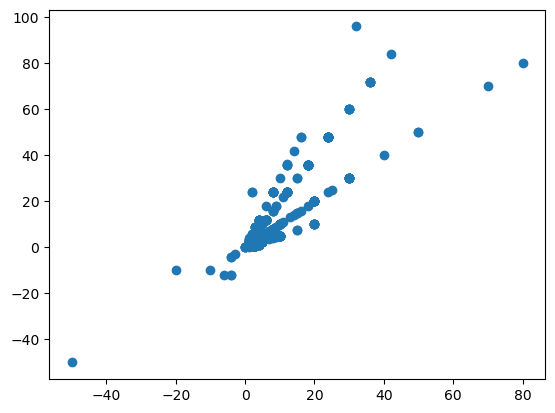

In [80]:
plt.scatter(x="quantity", y="GAU", data=nikhil)
plt.show()

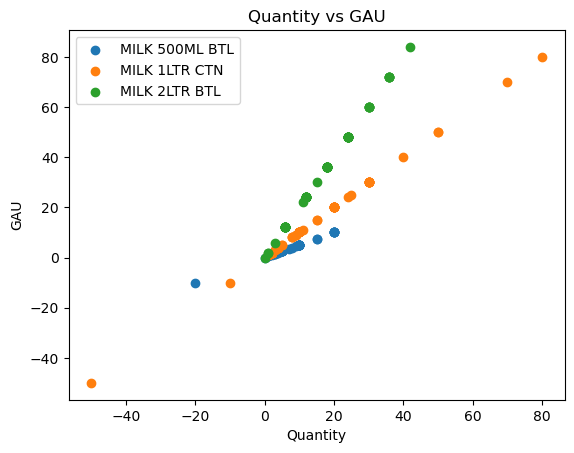

In [81]:
plt.scatter(x="quantity", y="GAU", data=nikhil[nikhil.prod_desc=="MILK 500ML BTL"],label="MILK 500ML BTL")
plt.scatter(x="quantity", y="GAU", data=nikhil[nikhil.prod_desc=="MILK 1LTR CTN"],label="MILK 1LTR CTN")
plt.scatter(x="quantity", y="GAU", data=nikhil[nikhil.prod_desc=="MILK 2LTR BTL"],label="MILK 2LTR BTL")
plt.xlabel("Quantity")
plt.ylabel("GAU")
plt.title("Quantity vs GAU")
plt.legend()
plt.show()

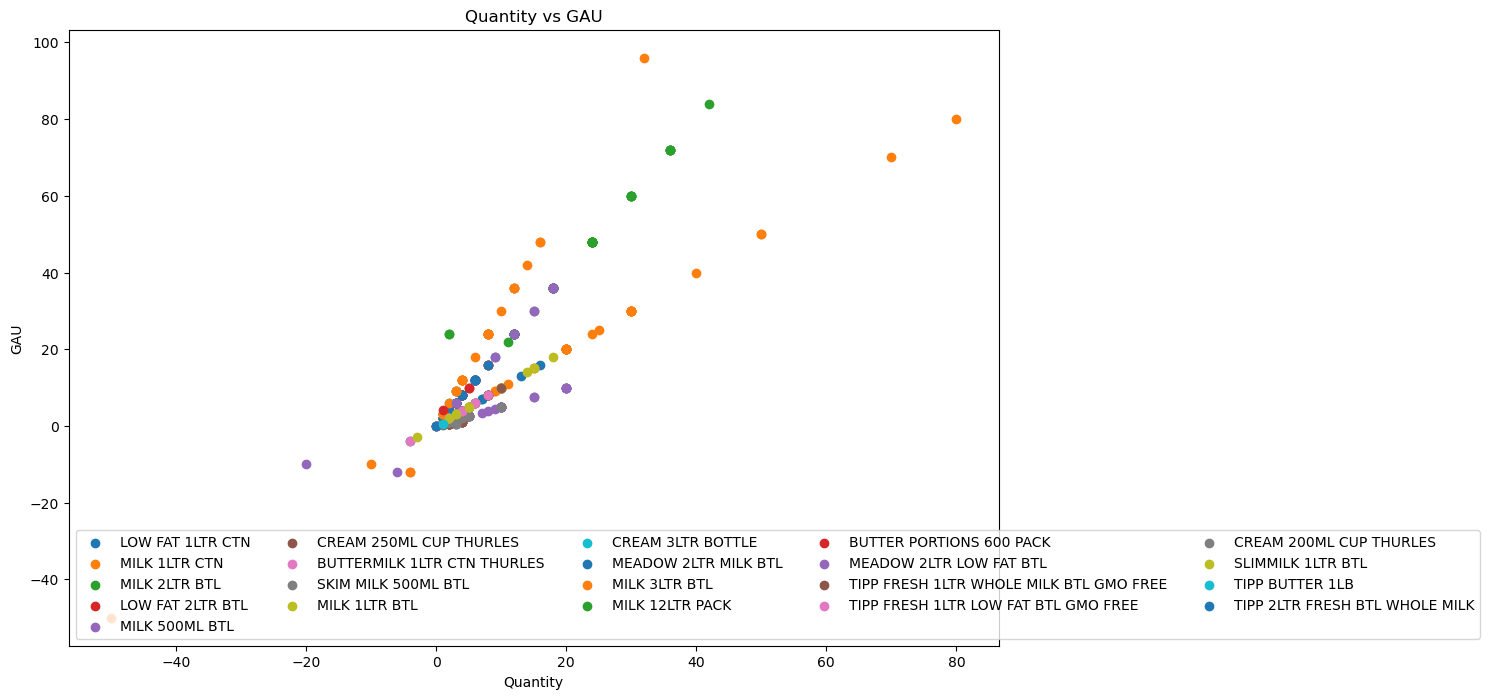

In [82]:
unique_products = nikhil.prod_desc.unique()
plt.figure(figsize=[12,8])
for x in unique_products:
    plt.scatter(x="quantity", y="GAU", data=nikhil[nikhil.prod_desc==x],label=x)
plt.xlabel("Quantity")
plt.ylabel("GAU")
plt.title("Quantity vs GAU")
plt.legend(loc="lower left",ncols=5)
plt.show()

In [83]:
uniq_prod = nikhil.prod_desc.value_counts(ascending=False).head(9).to_frame().reset_index().drop(labels="count", axis=1).prod_desc.unique()
uniq_prod

array(['MILK 2LTR BTL', 'MILK 1LTR CTN', 'LOW FAT 1LTR CTN',
       'LOW FAT 2LTR BTL', 'MILK 500ML BTL', 'MILK 3LTR BTL',
       'MILK 1LTR BTL', 'CREAM 250ML CUP THURLES', 'MEADOW 2LTR MILK BTL'],
      dtype=object)

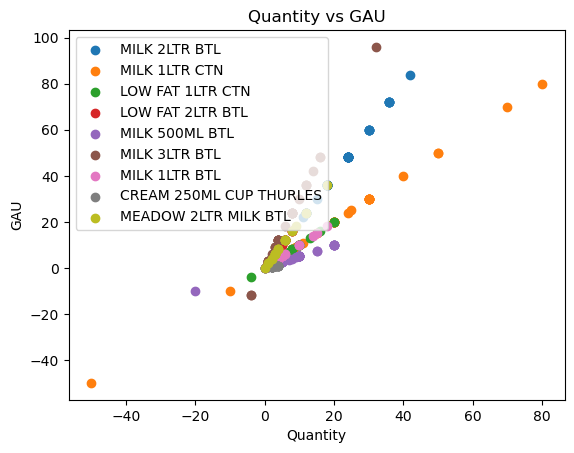

In [84]:
for x in uniq_prod:
    plt.scatter(x="quantity", y="GAU", data=nikhil[nikhil.prod_desc==x], label=x)
plt.legend(loc="upper left",ncols=1)
plt.xlabel("Quantity")
plt.ylabel("GAU")
plt.title("Quantity vs GAU")
plt.show()

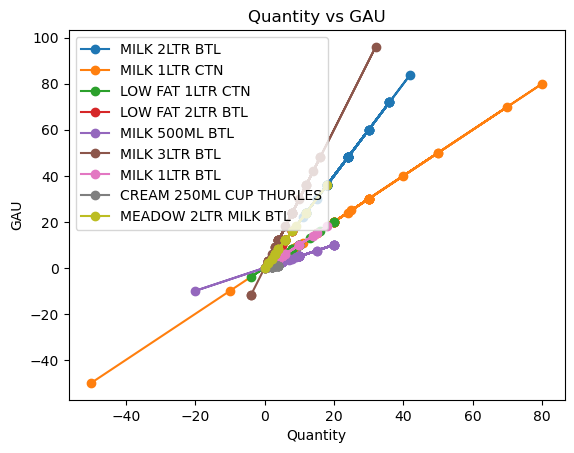

In [85]:
# Line plot + Scatter Plot together using "marker parameter"

for x in uniq_prod:
    plt.plot("quantity","GAU",data=nikhil[nikhil.prod_desc==x], marker='o', label=x)
plt.legend(loc="upper left",ncols=1)
plt.xlabel("Quantity")
plt.ylabel("GAU")
plt.title("Quantity vs GAU")
plt.show()

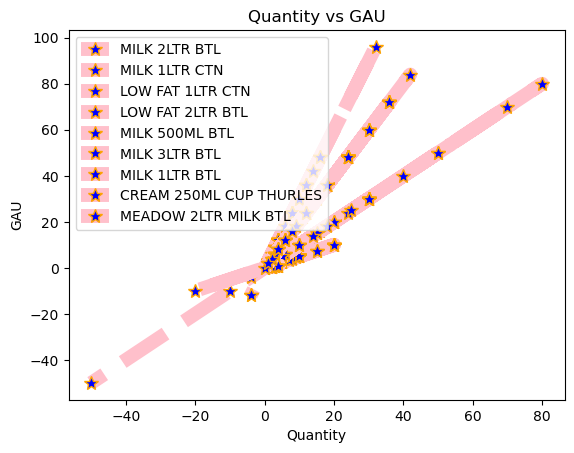

In [86]:
for x in uniq_prod:
    plt.plot("quantity","GAU",data=nikhil[nikhil.prod_desc==x], marker='*', ls='--', c="pink", mfc="blue", ms=10, mec='orange',
             mew=1, lw=10, label=x)
plt.legend(loc="upper left",ncols=1)
plt.xlabel("Quantity")
plt.ylabel("GAU")
plt.title("Quantity vs GAU")
plt.show()

In [87]:
nikhil.quantity.describe()

count    473.000000
mean       8.403805
std       10.104525
min      -50.000000
25%        2.000000
50%        5.000000
75%       10.000000
max       80.000000
Name: quantity, dtype: float64

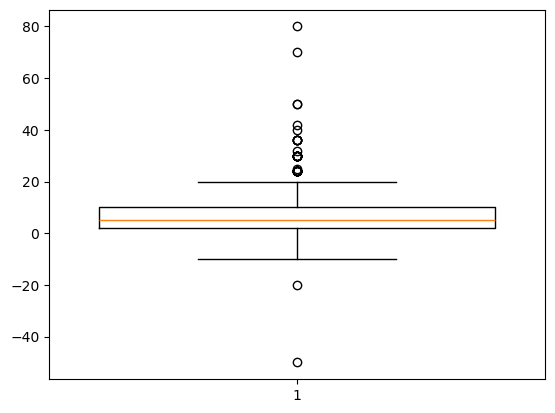

In [88]:
plt.boxplot(x="quantity", widths=0.8,data=nikhil)
plt.show()

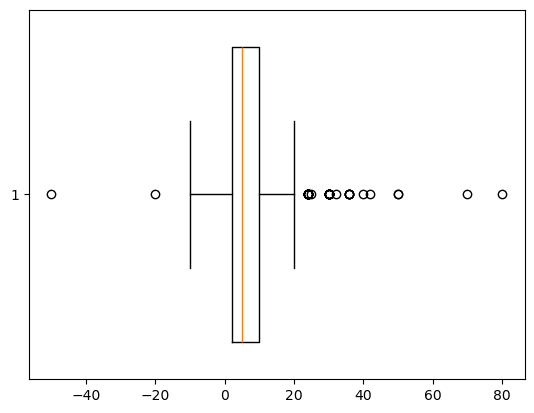

In [89]:
plt.boxplot(x="quantity", widths=0.8, vert= False, data=nikhil)
plt.show()

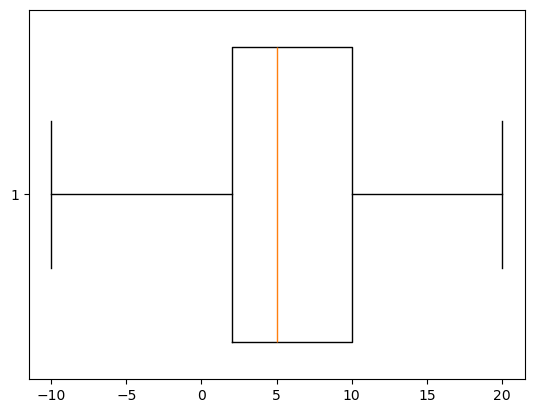

In [90]:
plt.boxplot(x="quantity", widths=0.8, vert= False, showfliers=False, data=nikhil)
plt.show()

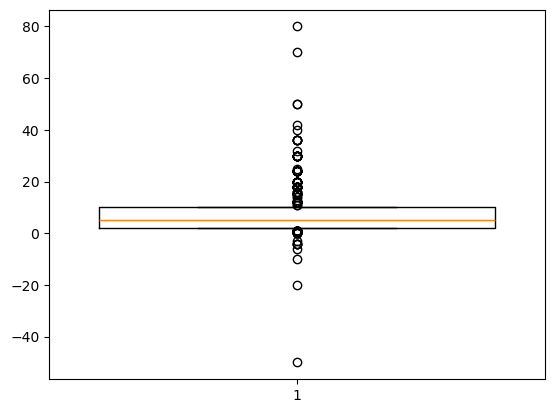

In [91]:
plt.boxplot(x="quantity", widths=0.8, whis=0, data=nikhil)
plt.show()

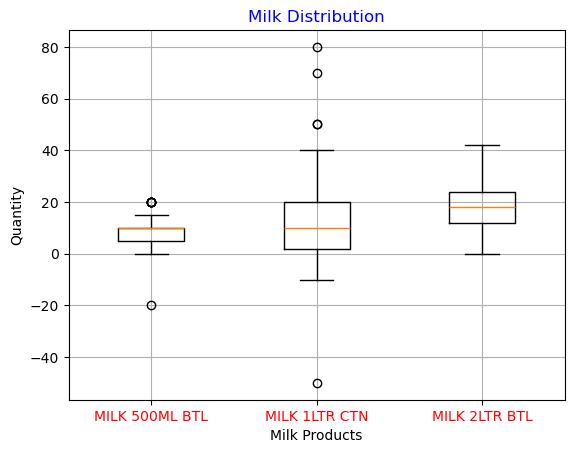

In [92]:
plt.boxplot(x="quantity",data=nikhil[nikhil.prod_desc=="MILK 500ML BTL"],positions=[0],widths=0.4)
plt.boxplot(x="quantity",data=nikhil[nikhil.prod_desc=="MILK 1LTR CTN"],positions=[1],widths=0.4)
plt.boxplot(x="quantity",data=nikhil[nikhil.prod_desc=="MILK 2LTR BTL"],positions=[2],widths=0.4)
plt.xlabel("Milk Products")
plt.ylabel("Quantity")
plt.title("Milk Distribution",c="blue")
plt.xticks(ticks=[0,1,2],labels=["MILK 500ML BTL","MILK 1LTR CTN","MILK 2LTR BTL"],c="red")
plt.grid(which="major")
plt.show()